In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


df = pd.read_csv('../data/payments.csv')

In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
scaler = StandardScaler()
df['Amount'] =scaler.fit_transform(pd.DataFrame(df['Amount']))
df_cleaned = df.drop(['Time'], axis =1)
df_cleaned = df_cleaned.drop_duplicates()

X = df_cleaned.drop('Class', axis = 1)
y = df_cleaned['Class']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Appliquer SMOTE sur l'ensemble d'entraînement
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [39]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced')

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.85      0.78      0.81        91

    accuracy                           1.00     55133
   macro avg       0.92      0.89      0.91     55133
weighted avg       1.00      1.00      1.00     55133

Confusion Matrix :
[[55029    13]
 [   20    71]]
AUC : 0.9750


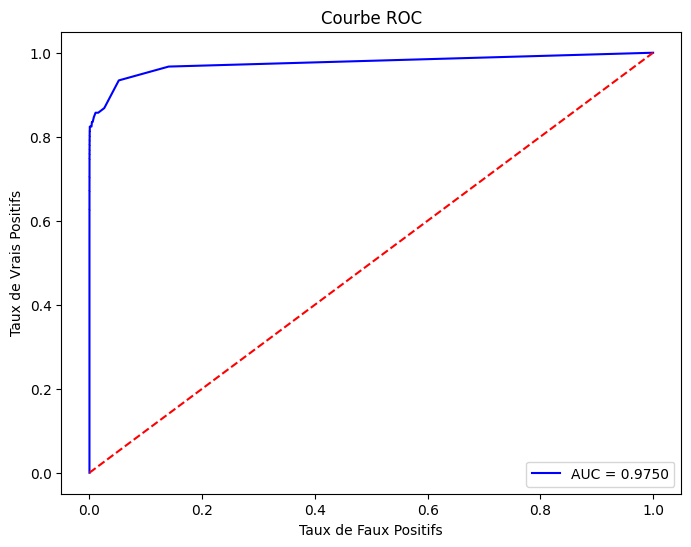

In [40]:
 # Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité de fraude

# Affichage des métriques
print("Classification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

# Calcul de l'AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC : {auc_score:.4f}")

# Tracer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [41]:
import joblib
joblib.dump(model, "fraud_detection.pkl")

['fraud_detection.pkl']